In [12]:
!pip install yfinance
#!pip install pandas

In [13]:
import yfinance as yf
import pandas as pd

__Using the yfinance Library to Extract Stock Data__

Using the `Ticker` module we can create an object that will allow us to access function to extract data.To do this we need to provide the ticker symbol for the stock,here the company is Apple and the Ticker symbol is `AAPL`.

In [14]:
apple = yf.Ticker("AAPL")

Stock Info

Now we can access functions and variable to extract the type of data we need.You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.

In [15]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"

__Stock Info__

Using the attribute info we can extract information about the stock as a Python dictionary.

In [16]:
apple_info = apple.info
apple_info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

We can get the `'country'` using the key country

In [17]:
apple_info['country']

'United States'

__Extracting Share Price__

A share is the single smallest part of a company's stock that you can buy,the prices of these shares fluctuate over time.Using the `history()` method we can get the share price of the stock over a certain period of time.Using the `period` parameter we can set how far back from the present to get data. The option for `period` are 1 day(1d),5d,1 month(1mo),3mo,6mo,1 year(1y),2y,5y,10y,ytd,and max.

In [18]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame.With the Date as the index the share `Open`,`High`,`Low`,`Close`,`Volume`,and `Stock Splits` are given for each day.

In [19]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` parameter to `True` so the change takes place to the DataFrame itself.

In [20]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:

<Axes: xlabel='Date'>

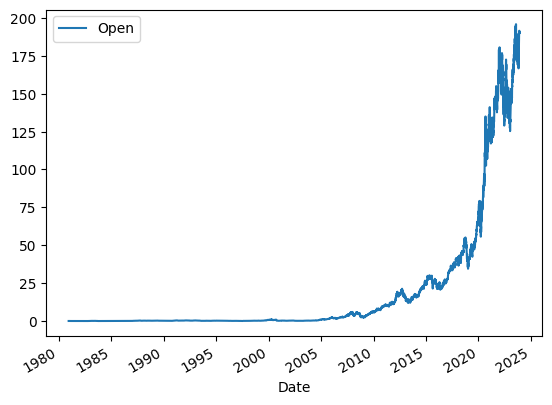

In [21]:
apple_share_price_data.plot(x="Date",y="Open")

__Extracting Dividends__

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history' function.

In [24]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
2023-08-11 00:00:00-04:00    0.240000
2023-11-10 00:00:00-05:00    0.240000
Name: Dividends, Length: 81, dtype: float64

We can plot the dividends overtime:

<Axes: xlabel='Date'>

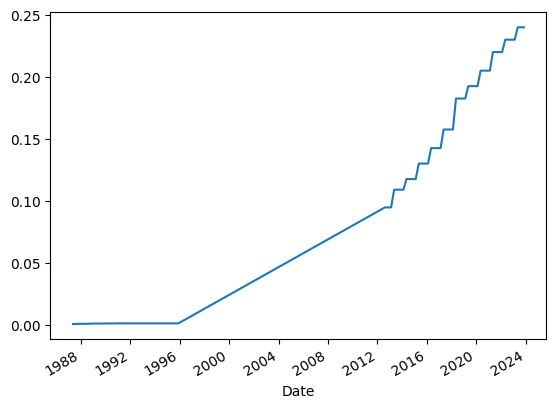

In [25]:
apple.dividends.plot()